# AKUNIN

Dibuat oleh:

Nama: Mohamad Doddy Sujatmiko

NIM: 21.11.4344

## Install Dependency

Install beberapa library yang belum tersedia

In [ ]:
!pip install opendatasets

In [ ]:
!pip install PySastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 2.3 MB/s eta 0:00:00


In [ ]:
!pip install wordcloud

In [ ]:
# !pip install "tensorflow==2.16.1"

In [ ]:
# !pip install "tf-keras==2.16.*"

## Download Datasets

Download dataset yang akan digunakan langsung dari kaggle

In [ ]:
import opendatasets as od

# {"username":"
# doddysujatmiko
# ","key":"
# b09a20abafb2ba197b53a19cc34d681f
# "}

od.download('https://www.kaggle.com/datasets/ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text')
od.download('https://www.kaggle.com/datasets/oswinrh/indonesian-stoplist')
od.download('https://www.kaggle.com/datasets/deniyulian/sentiment-analysis')
# od.download('https://www.kaggle.com/datasets/ashwiniyer176/toxic-tweets-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: doddysujatmiko
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text


100%|██████████| 814k/814k [00:00<00:00, 127MB/s]


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

 doddysujatmiko
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/oswinrh/indonesian-stoplist


100%|██████████| 2.27k/2.27k [00:00<00:00, 1.50MB/s]


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

 doddysujatmiko
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/deniyulian/sentiment-analysis


100%|██████████| 14.8M/14.8M [00:00<00:00, 117MB/s] 

## Load Dataset

In [ ]:
import pandas as pd

df = pd.read_csv('/content/indonesian-abusive-and-hate-speech-twitter-text/data.csv', encoding='latin-1')
df_2 = pd.read_csv('/content/sentiment-analysis/Dataset-Sentimen-Analisis-Bahasa-Indonesia/Dataset-Sentimen-Analisis-Bahasa-Indonesia-master/dataset_komentar_instagram_cyberbullying.csv')
# df_3 = pd.read_csv('/content/toxic-tweets-dataset/FinalBalancedDataset.csv')

### Mengambil data dari berbagai dataset

In [ ]:
positive_both = df[(df['HS'] == 1) & (df['Abusive'] == 1)].drop(columns=['Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'])
positive_hs = df[(df['HS'] == 1) & (df['Abusive'] == 0)].drop(columns=['Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'])
positive_a = df[(df['HS'] == 0) & (df['Abusive'] == 1)].drop(columns=['HS','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'])
negative = df[(df['HS'] == 0) & (df['Abusive'] == 0)].drop(columns=['Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'])
positive_2 = df_2[df_2['Sentiment'] == 'negative'].drop(columns=['Id'])
negative_2 = df_2[df_2['Sentiment'] == 'positive'].drop(columns=['Id'])
# positive_3 = df_3[df_3['Toxicity'] == 1].drop(columns=['Unnamed: 0'])
# negative_3 = df_3[df_3['Toxicity'] == 0].drop(columns=['Unnamed: 0'])

In [ ]:
positive_both = positive_both.rename(columns={'Tweet':'text','HS':'label'})
positive_both.count()

text     3295
label    3295
dtype: int64

In [ ]:
positive_hs = positive_hs.rename(columns={'Tweet':'text','HS':'label'})
positive_hs.count()

text     2266
label    2266
dtype: int64

In [ ]:
positive_a = positive_a.rename(columns={'Tweet':'text','Abusive':'label'})
positive_a.count()

text     1748
label    1748
dtype: int64

In [ ]:
negative = negative.rename(columns={'Tweet':'text','HS':'label'})
negative.count()

text     5860
label    5860
dtype: int64

In [ ]:
positive_2 = positive_2.rename(columns={'Instagram Comment Text':'text', 'Sentiment':'label'})
positive_2['label'] = positive_2['label'].apply(lambda label: 1)
positive_2.count()

label    200
text     200
dtype: int64

In [ ]:
negative_2 = negative_2.rename(columns={'Instagram Comment Text':'text', 'Sentiment':'label'})
negative_2['label'] = negative_2['label'].apply(lambda label: 0)
negative_2.count()

label    200
text     200
dtype: int64

In [ ]:
# negative_3 = negative_3.rename(columns={'tweet':'text', 'Toxicity':'label'})
# negative_3['label'] = negative_3['label'].apply(lambda label: 2)
# negative_3.count()

In [ ]:
# positive_3 = positive_3.rename(columns={'tweet':'text', 'Toxicity':'label'})
# positive_3['label'] = positive_3['label'].apply(lambda label: 3)
# positive_3.count()

In [ ]:
# df = pd.concat([positive_hs.head(1253), positive_a.head(1252), positive_both, negative.head(5800), positive_2, negative_2, positive_3, negative_3], ignore_index=True)
# df = pd.concat([positive_hs, positive_a, positive_both, negative, positive_2, negative_2, positive_3, negative_3], ignore_index=True)
df = pd.concat([positive_hs, positive_a, positive_both, negative, positive_2, negative_2], ignore_index=True)
# df = pd.concat([positive_hs, positive_a, positive_both, negative], ignore_index=True)

In [ ]:
df.head()

,text,label
0,Aktor huruhara 98 Prabowo S ingin lengserkan p...,1
1,RT USER USER USER PKI hanya muncul jika jelang...,1
2,USER USER USER USER USER USER USER USER USER I...,1
3,pinokio umur 3 taonan tuh. #2019GantiPresiden,1
4,RT USER benci sekali dgn Umat Islam,1


### Mengecek keseimbangan data

In [ ]:
df[df['label'] == 0].count()

text     6060
label    6060
dtype: int64

In [ ]:
df[df['label'] == 1].count()

text     7509
label    7509
dtype: int64

<Axes: xlabel='label', ylabel='count'>

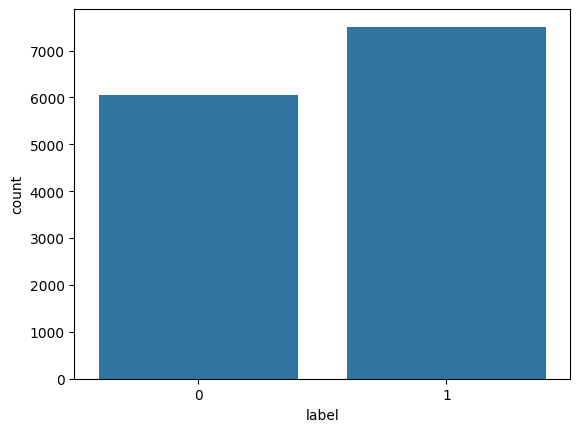

In [ ]:
import seaborn as sns

sns.countplot(x='label', data=df)

### Karena data tidak seimbang, dilakukan resample, penurunan data untuk mayoritas, dan penaikan data pada minoritas. Agar upsample pada minoritas tidak terlalu besar dipilih angka 8000 untuk setiap kelas.

In [ ]:
from sklearn.utils import resample
df0 = df[(df['label']==0)]
df1 = df[(df['label']==1)]
# df2 = df[(df['label']==2)]
# df3 = df[(df['label']==3)]

n = 6000

df0 = resample(df0,
              replace=True,
              n_samples= n,
              random_state=42)

df1 = resample(df1,
              replace=True,
              n_samples= n,
              random_state=42)

# df2 = resample(df2,
#               replace=True,
#               n_samples= n,
#               random_state=42)

# df3 = resample(df3,
#               replace=True,
#               n_samples= n,
#               random_state=42)

# df = pd.concat([df_minority_upsampled, df_minority_upsampled_2, df_majority], ignore_index=True)
# df = pd.concat([df0,df1,df2,df3], ignore_index=True)
df = pd.concat([df0,df1], ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12000 non-null  object
 1   label   12000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 187.6+ KB


### Keseimbangan data setelah upsample dan downsample

<Axes: xlabel='label', ylabel='count'>

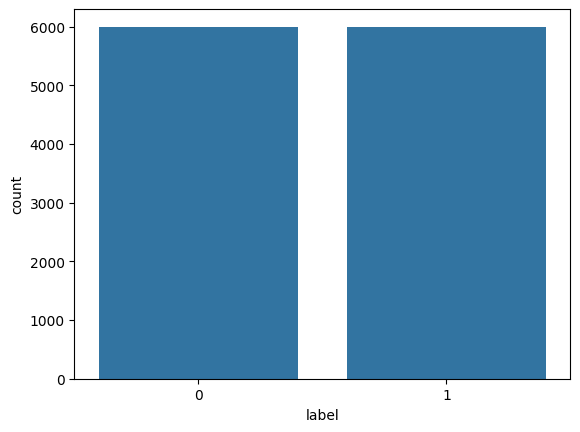

In [ ]:
import seaborn as sns

sns.countplot(x='label', data=df)

## Preprocessing

### Mengaplikasikan lowercase, menghilangkan tag, enter, retweet, user, url, unicode, dan character non huruf. Kemudian menghapus stopword, merubah kata alay ke bentuk asli, dan melakukan stem kata.

In [ ]:
import re
import unicodedata

import numpy as np

def lowercase(text):
  return text.lower()

def remove_stair(text):
  return re.sub('#',' ',text)

def remove_enter(text):
  return re.sub('\n',' ',text)

def remove_retweet(text):
  return re.sub('rt',' ',text)

def remove_user(text):
  return re.sub('user',' ',text)

def remove_url(text):
  return re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text)

def remove_unicode(text):
  text = re.sub(r'\bx[a-fA-F0-9]{2}\b', ' ', text)
  text = re.sub(r'\bx([a-fA-F0-9]{2})', ' ', text)
  return text

def remove_nonaplhanumeric(text):
  return re.sub('[^a-zA-Z]+', ' ', text)

alay = pd.read_csv('/content/indonesian-abusive-and-hate-speech-twitter-text/new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = dict(zip(alay[0], alay[1]))
def normalize_alay(text):
  return ' '.join([alay_dict[word] if word in alay_dict else word for word in text.split(' ')])

stopwords = pd.read_csv('/content/indonesian-stoplist/stopwordbahasa.csv', header=None)
stopwords_indonesia = np.concatenate((stopwords[0].values, ['nih', 'sih', 'gue', 'lu', 'uniform', 'resource', 'locator', 'nya', 'ya']))
# 'nih', 'sih', 'gue', 'lu'
def remove_stopword(text):
  text = ' '.join(['' if word in stopwords_indonesia else word for word in text.split(' ')])
  text = remove_extra_spaces(text)
  text = text.strip()
  return text

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer_indonesia = factory.create_stemmer()
def stemming(text):
  return stemmer_indonesia.stem(text)

def remove_extra_spaces(text):
  text = re.sub(r'\s+', ' ', text)
  text = text.strip()
  return text

In [ ]:
def clean_text(text):
  text = lowercase(text)
  text = remove_stair(text)
  text = remove_enter(text)
  text = remove_retweet(text)
  text = remove_user(text)
  text = remove_url(text)
  text = remove_unicode(text)
  text = remove_nonaplhanumeric(text)
  text = remove_extra_spaces(text)
  text = normalize_alay(text)
  text = remove_stopword(text)
  text = remove_extra_spaces(text)
  text = stemming(text)
  return text

In [ ]:
df['text'] = df['text'].apply(clean_text)
df.head(100)

,text,label
0,teliti orang kristen cina hehe,0
1,agama pakai pakai ketat lekuk tubuh sama orang...,0
2,tomohon pusat ajar agama kristen katolik khusu...,0
3,mandang orang agama kayak peduli agama orang t...,0
4,guntur romli,0
...,...,...
95,festival pesona tambora angkat eksotisme alam ...,0
96,deklarasi anti hoaks pilih kepala daerah damai...,0
97,be anya tuju hati logika hati tenang be anya l...,0
98,buah ketapang makan onta abang cinta,0


### Membuat wordcloud untuk mengetahui kata yang sering muncul

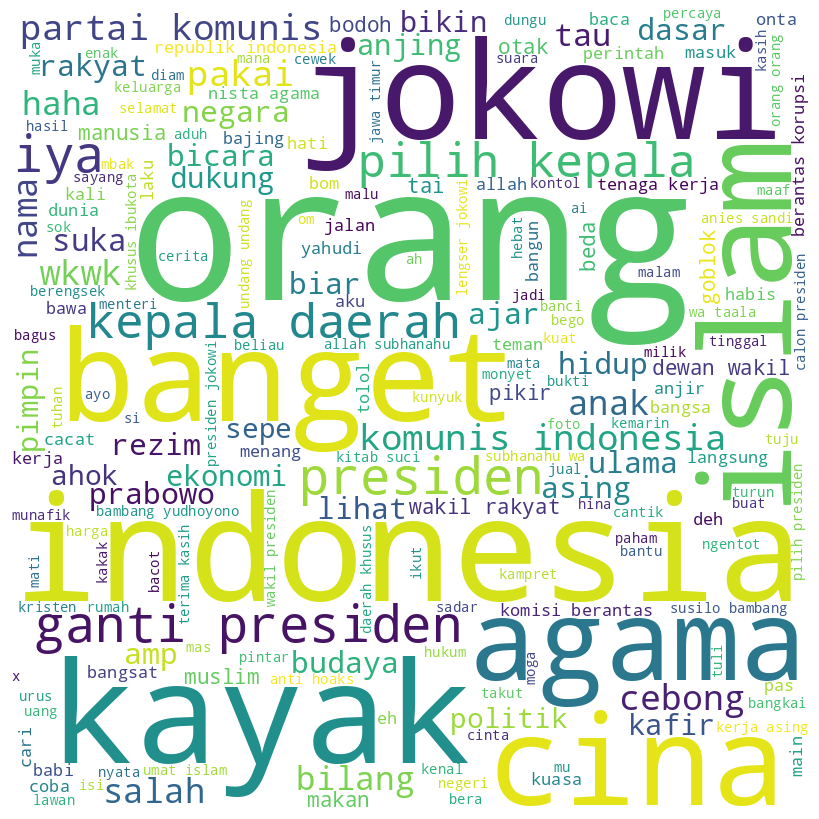

In [ ]:
wc = ''

for words in df['text'].values:
  wc += ' '+words

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(wc)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Membuat word index untuk melakukna tokenisasi secara manual

In [ ]:
import re

def generate_word_index(texts):
    word_index = {}
    index = 1  # Start indexing from 1, reserve index 0 for unknown words
    for text in texts:
        tokens = re.findall(r'\w+', text.lower())
        for token in tokens:
            if token not in word_index:
                word_index[token] = index
                index += 1
    return word_index

word_index = generate_word_index(df['text'].values)

### Melihat jumlah vocabulary

In [ ]:
len(word_index)

10350

### Melihat jumlah kata pada kalimat terpanjang untuk menentukan padding

In [ ]:
longest = 0
for text in df['text'].values:
  if len(text.split(' ')) > longest:
    longest = len(text.split(' '))

longest

101

### Proses tokenisasi dan menambah padding

In [ ]:
import re

X = []

for text in df['text'].values:
    text = re.split(r'\W+', text.lower())
    text = [word_index.get(word, 0) for word in text]
    text += [0] * (120 - len(text))
    X.append(text)

## Data Split

Datasplit dibagi menjadi 60% train, 20% validation, dan 20% test.

In [ ]:
from sklearn.model_selection import train_test_split

X_train_, X_test, y_train_, y_test = train_test_split(
    X,
    df['label'],
    test_size=0.2,
    random_state=69,
    stratify=df['label'].values,
)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train_,
    y_train_,
    test_size=0.25,
    random_state=69,
    stratify=y_train_
)

In [ ]:
import tensorflow as tf

In [ ]:
train_ds_unbatch = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_ds_unbatch = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_ds_unbatch = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [ ]:
train_ds = train_ds_unbatch.shuffle(42).batch(32)
val_ds = val_ds_unbatch.shuffle(42).batch(32)
test_ds = test_ds_unbatch.shuffle(42).batch(32)

## Creating Model

Model dibuat dengan 4 layer, yaitu embedding, lstm, layer dense relu, dan layer dense softmax untuk multiclass classification

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(
#         input_dim=len(word_index)+1,
#         output_dim=64,
#         mask_zero=True),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(4, activation='softmax')
# ])

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=len(word_index)+1,
        output_dim=64,
        mask_zero=True,
        name = 'embedding'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64), name='lstm'),
    tf.keras.layers.Dense(64, activation='relu', name='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='sigmoid')
])

In [ ]:
# model.compile(optimizer=tf.keras.optimizers.Adam(),
#               loss = 'sparse_categorical_crossentropy',
#               metrics=['accuracy'])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          662464    
                                                                 
 lstm (Bidirectional)        (None, 128)               66048     
                                                                 
 relu (Dense)                (None, 64)                8256      
                                                                 
 sigmoid (Dense)             (None, 1)                 65        
                                                                 
Total params: 736833 (2.81 MB)
Trainable params: 736833 (2.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


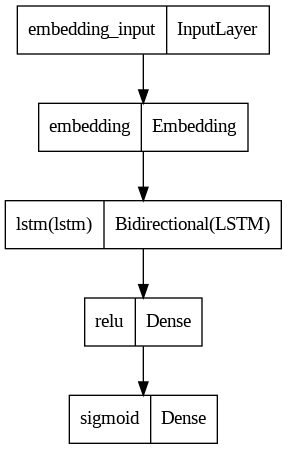

In [ ]:
tf.keras.utils.plot_model(model)

## Training Model

In [ ]:
model_history = model.fit(x=train_ds,
                          validation_data=val_ds,
                          epochs=4)

Epoch 1/4
225/225 [==============================] - 53s 183ms/step - loss: 0.4178 - accuracy: 0.8047 - val_loss: 0.2534 - val_accuracy: 0.9017
Epoch 2/4
225/225 [==============================] - 23s 103ms/step - loss: 0.1551 - accuracy: 0.9415 - val_loss: 0.2485 - val_accuracy: 0.9092
Epoch 3/4
225/225 [==============================] - 21s 92ms/step - loss: 0.0820 - accuracy: 0.9715 - val_loss: 0.3414 - val_accuracy: 0.9112
Epoch 4/4
225/225 [==============================] - 21s 92ms/step - loss: 0.0491 - accuracy: 0.9836 - val_loss: 0.3347 - val_accuracy: 0.9150


## Evaluasi model

In [ ]:
y_pred = model.predict(X_test)
# y_pred = model.predict(test_ds)
# y_pred = [np.argmax(pred) for pred in y_pred]
y_pred = [0 if pred < 0.5 else 1 for pred in y_pred]

75/75 [==============================] - 3s 15ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1200
           1       0.90      0.92      0.91      1200

    accuracy                           0.91      2400
   macro avg       0.91      0.91      0.91      2400
weighted avg       0.91      0.91      0.91      2400



## Lain - lain

Pada sesi ini, dilakukan percobaan input dan output model, mengekspor model agar dapat digunakan pada extension, mengekspor word_index, stopwords, dan kamus alay

In [ ]:
p = 'dasar cina'
p = re.split(r'\W+', p.lower())
p = [word_index.get(word, 0) for word in p]
p += [0] * (120 - len(p))
# p = model.predict([p])
model.predict([p])
# np.argmax(model.predict([p]))
# print(0 if p < 0.5 else 1)

1/1 [==============================] - 3s 3s/step


array([[0.97817296]], dtype=float32)

In [ ]:
model.save('/content/model.h5', save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import json

with open('/content/word_index.json', "w") as json_file:
    json.dump(word_index, json_file)

In [ ]:
import json

with open('/content/alay_dict.json', "w") as json_file:
    json.dump(alay_dict, json_file)

In [ ]:
stopwords_indonesia

array(['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar',
       'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah',
       'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara',
       'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi',
       'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah',
       'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana',
       'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan',
       'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik',
       'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini',
       'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah',
       'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan',
       'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada',
       'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah',
       'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai',
       'berdatangan', 'beri', '